# [LEGALST-123] Lab 05: Central Limit Theorem, Confidence Intervals, Hypothesis Testing

In [2]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by allowing students to contextualize the statistical ideas of the Central Limit Theorem and hypothesis testing by using a dataset containing continuous variables. 

**Data & EDA**: 
... explanation needed ... 

**Bootsrapping**:
... explanation needed ... 

**Confidence Interval**: 
... explanation needed ... 

**Central Limit Theorem**: 
... explanation needed ... 

<br/>

<hr style="border: 1px solid #fdb515;" />

## Data

For this lab, we'll be using the same datasets used in our previous labs, the Nashville's police stops dataset. Run the following cell below to read the `DataFrame`.

In [4]:
# Issue loading; Will work in Datahub.
# stops = pd.read_csv("https://github.com/ds-modules/data/raw/main/nashville_sample.csv")

user = "suminpark" #insert your user name
path = "/Users/" + user +  "/Documents/GitHub/Modules/Legalst-123/labs/data" #edit this later for the actual lab. 
# user = "fionaaaaa_mei" #insert your user name
# path = "/Users/" + user +  "/Documents/GitHub/Legalst-123/labs/data" #edit this later for the actual lab. 
stops = pd.read_csv(path + "/stops_sample.csv", index_col = 0)
stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


## Exploratory Data Analysis

Let's refer back to our last lab, when we explored different distributions using histogram. In particular, we looked at distribution of stops counts for `subject_sex`. For this notebook, let's look at the distribution of `subject_race` and `subject_age`. 

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.1**:
Before explore these variables, let's clean the dataset. In the code cell below, drop any columns that has "raw" in their column names. Then, drop the rows with *any* null values EXCEPT for the columns` "contraband_found"`, `"contraband_drugs"`, `"contraband_weapons"`, `"search_basis"`, and `"notes"`.
</div>

Hint 1: Look at lab 04 question 1.1 and question 1.2! It should be very similar. 

In [5]:
# YOUR CODE HERE. You can use multiple lines than given lines. 
# ... 
# ...
# stops = ...

In [6]:
#### just a sec, working on time series to check something.
time_series_df = stops.copy()
time_series_df['datetime'] = pd.to_datetime(time_series_df['date'], format='%Y-%m-%d')
time_series_df['datetime'][0] #taking the first itme out from the "date" Series, the object should be a timestamp.

Timestamp('2010-04-18 00:00:00')

In [21]:
time_series_df['datetime'][0].strftime('%b %Y')
time_series_df['adjusted_datetime'] = [time_series_df['datetime'][index].strftime('%b %Y') for index in np.arange(time_series_df.shape[0])]
time_series_df['adjusted_datetime']

datetime
2010-04-18    Apr 2010
2015-01-19    Jan 2015
2015-01-15    Jan 2015
2013-05-17    May 2013
2010-09-01    Sep 2010
                ...   
2012-07-01    Jul 2012
2012-01-10    Jan 2012
2016-08-12    Aug 2016
2011-08-24    Aug 2011
2012-09-12    Sep 2012
Name: adjusted_datetime, Length: 1000, dtype: object

In [23]:
time_series_df.index = time_series_df['datetime']
groupedby_count = time_series_df.groupby('adjusted_datetime').count()

groupedby_count


,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view,datetime
adjusted_datetime,,,,,,,,,,,,,,,,,,,,,
Apr 2010,10,10,10,10,10,10,10,10,10,10,...,0,10,10,10,10,10,10,10,10,10
Apr 2011,11,11,11,11,11,11,8,8,8,11,...,1,11,11,11,11,11,11,11,11,11
Apr 2012,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Apr 2013,15,15,15,15,15,15,14,14,14,15,...,15,15,15,15,15,15,15,15,15,15
Apr 2014,13,13,13,13,12,12,11,12,11,13,...,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sep 2014,12,12,12,12,11,11,9,10,9,12,...,12,12,12,12,12,12,12,12,12,12
Sep 2015,10,10,10,10,9,9,9,9,9,10,...,10,10,10,10,10,10,10,10,10,10
Sep 2016,6,6,6,6,4,4,5,5,5,6,...,6,6,6,6,6,6,6,6,6,6


ConversionError: Failed to convert value(s) to axis units: Index(['Apr 2010', 'Apr 2011', 'Apr 2012', 'Apr 2013', 'Apr 2014', 'Apr 2015',
       'Apr 2016', 'Apr 2017', 'Apr 2018', 'Aug 2010',
       ...
       'Oct 2018', 'Sep 2010', 'Sep 2011', 'Sep 2012', 'Sep 2013', 'Sep 2014',
       'Sep 2015', 'Sep 2016', 'Sep 2017', 'Sep 2018'],
      dtype='object', name='adjusted_datetime', length=111)

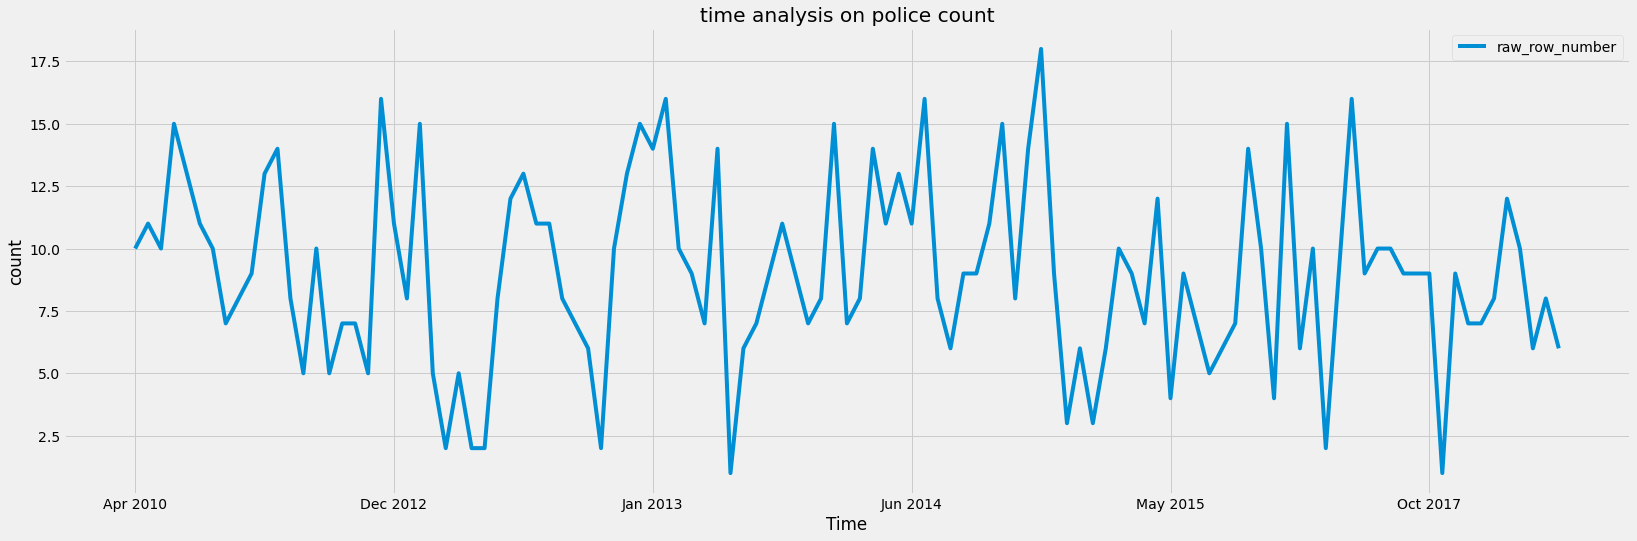

In [31]:
sub_plot = groupedby_count.plot(y='raw_row_number', use_index=True,figsize = (25, 8))
# Adds a x-axis label
sub_plot.set_xlabel("Time")

# Adds a y-axis label
sub_plot.set_ylabel("count")

# Adds a title to our line plot
sub_plot.set_title("time analysis on police count")


# Adds the time on the x-axis
sub_plot.set_xticks(groupedby_count.index)


# Sets the size of the x-axis
sub_plot.tick_params(axis='x', labelsize=13)

In [11]:
#SOLUTION 
raw_columns = [col for col in stops.columns if 'raw_' in col]
necessary_cols = stops.columns.drop(["contraband_found", "contraband_drugs", "contraband_weapons", "search_basis", "notes"]) #SOLUTION 
stops = stops.dropna(subset=necessary_cols,axis=0)
stops = stops.drop(raw_columns, axis=1)

In [12]:
stops.describe()

,index,time,lat,lng,precinct,reporting_area,zone,subject_age
count,4.890000e+02,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,1.623813e+06,47010.429448,36.151011,-86.749530,4.498978,7262.711656,470.546012,37.075665
std,9.293382e+05,25074.932653,0.067460,0.070825,2.238930,11272.749123,225.083587,13.562258
min,1.025100e+04,60.000000,35.727554,-87.010664,1.000000,889.000000,111.000000,16.000000
25%,6.790540e+05,30720.000000,36.115037,-86.785525,3.000000,3021.000000,311.000000,26.000000
50%,1.747782e+06,48660.000000,36.155076,-86.752310,5.000000,5413.000000,511.000000,34.000000
75%,2.421645e+06,68340.000000,36.186962,-86.711017,6.000000,8810.000000,621.000000,46.000000
max,3.082012e+06,86280.000000,36.342921,-86.590802,8.000000,92960.000000,835.000000,82.000000


<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.2**:
....

</div>

In [4]:
stops.columns

Index(['index', 'raw_row_number', 'date', 'time', 'location', 'lat', 'lng',
       'precinct', 'reporting_area', 'zone', 'subject_age', 'subject_race',
       'subject_sex', 'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

In [ ]:
stops.pivot_table("index = "subject_race", columns= "violation", values = "search_conducted"")

In [ ]:
# Histogram code



plt.hist(male_stops['subject_age'], label = "male", alpha = 0.5,  bins=num_bins, range=hist_range, edgecolor='k') #SOLUTOIN 
plt.xlabel('age')
plt.ylabel('count')
plt.show()

What is the shape of the plot?

Report the 25th, 50th, and 75th percentiles. Keep in mind that valid answers have domain [0,100].

In [ ]:
# Save column into an object called 'obama'

# Find 25th percentile

In [ ]:
# Find 50th percentile

In [ ]:
# Find 75th percentile

What does this distrubtion tell you about the American peoples' thoughts on Obama?

### Question 1

Now do the same for "Feeling Thermometer - Donald Trump."

In [ ]:
# Histogram

In [ ]:
# Save an object called 'trump'

# Find 25th percentile

In [ ]:
# Find 50th percentile

In [ ]:
# Find 75th percentile

How do the two distributions compare?

Both distributions have a significant amount of their points at the two extremes (0 or 100). What does this tell you about the standard deviation of the data? Do the American people have strong opinions regarding these two candidates?

## Bootstrap

Write code that resamples the "ftobama" distribution, then plot a histogram. Be sure to resample the number of rows that exist in the dataset, with replacement.

In [ ]:
# Find number of rows

In [ ]:
# Resample the data

In [ ]:
# Histogram

In [ ]:
# 50th percentile/median

### Question 2

How does the resampled median compare to the original median? Does this result make sense?

Now, define a function titled "bootstrap_median" that takes the original sample, the column name we're concerned with, and the number of resamples as arguments. The function should calculate simulated medians and return them in an array.

In [ ]:
# Define a function "bootstrap_median" with arguments "original_sample", "label", and "replications" 
# that returns an array with the medians found in replications
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.loc[:, label]
    medians = []
    for i in np.arange(replications):
        ...

    return ...

Replicate the bootstrap 10,000 times, then save the results.

In [ ]:
# Resample 10,000 times

Plot a histogram of the resampled medians, and plot the 95% confidence interval. (hint: to plot the confidence interval, try using the 2.5 percentile and 97.5 percentile values in a numpy array)

In [ ]:
# Plot medians
...
plots.plot(np.array([pd.Series(medians).quantile(q=.025), pd.Series(medians).quantile(q=.975)]), np.array([0, 0]), color='yellow', lw=10, zorder=1)

### Question 3

What can you infer about the likely population median given the above distribution?

Finally, write a simulation that constructs 100 confidence intervals. (Remember to use the 2.5 and 97.5 percentiles!)

In [ ]:
# Construct 100 confidence intervals
left_ends = []
right_ends = []

for i in np.arange(100):
    ...
    
intervals = pd.DataFrame(data={"Left": left_ends, "Right": right_ends})

#### Question 4

Finally, plot 100 confidence intervals (stacked on top of each other). What can you conclude about the median?

In [ ]:
# Plot the confidence intervals
plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = ...
    plots.plot(ends, np.array([i + 1, i + 1]), color='gold')
plots.xlabel('Median')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');

## Confidence Interval

## Central Limit Theorem (CLT)